In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

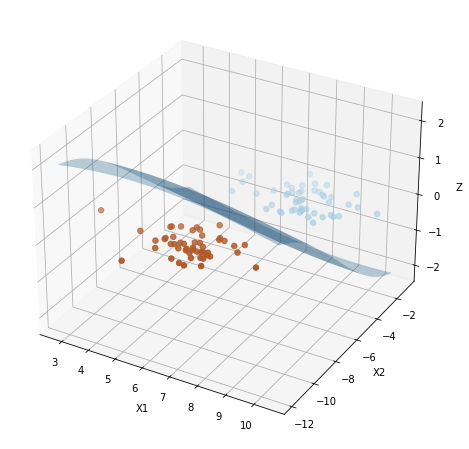

In [2]:
# Gerando dados de treinamento aleatórios
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Adicionando uma terceira dimensão aos dados de treinamento
z = np.zeros((100, 1))
X = np.hstack((X, z))

# Treinando o modelo SVM com o kernel RBF
clf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovr')
clf.fit(X, y)

# Plotting os dados e a superfície de separação
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=30, cmap=plt.cm.Paired)

# Obtendo o limite da superfície de separação
xx, yy = np.meshgrid(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100),
                     np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros(len(xx.ravel()))])
Z = Z.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, alpha=0.3)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()
#Neste exemplo, adicionamos uma terceira dimensão aos dados de treinamento e, ao plotar a superfície de separação, usamos a função decision_function do modelo SVM para calcular o valor Z para cada ponto (X1, X2) no grid. Finalmente, plotamos a superfície de separação usando a função plot_surface do módulo Axes3D.


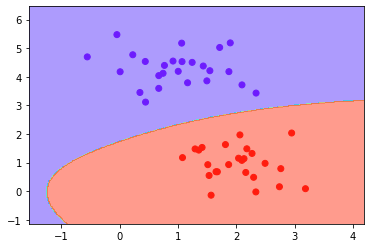

In [3]:
# Criamos um conjunto de dados artificial com duas classes
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Treinamos o modelo SVM usando o radial basis function (RBF) como kernel
model = svm.SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

# Obtemos os limites de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Classificamos todas as coordenadas da grade
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Desenhamos o hiperplano de separação
plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.5)

plt.show()